# Exploratory Data Analysis of the Dataset

# Data Description

The dataset is related with direct marketing campaigns of a Portuguese banking institution.
This dataset gives information about the marketing campaigns of the Bank which were based on phone calls. The Task is to analyze the dataset, inorder to find ways to look for future strategies to improve the marketing campaigns for the Bank

# What is a Term Deposit ?

A Term Deposit is a bank investment where you deposit a sum of money for a fixed period at a predetermined interest rate. The Funds are
locked in until the term ends, offering higher interest than a savings account. Its a low risk option with a guaranteed return

# Importing the Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [70]:
df = pd.read_csv(r"C:\Users\amaan\Desktop\Datasets\bank_data.csv")
df = df.drop(columns=['Unnamed: 0'])

In [71]:
df.head()

,Age,Job,Marital,education,Credit_default,Bank_balance,Housing_loan,Personal_loan,Contact_type,Last_Contact_day,Last_contact_month,Call_Duration,Current_campaign_contact,Days_since_prev_contact,Prev_campaign_contacts,Prev_outcome,Term_deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       11162 non-null  int64 
 1   Job                       11162 non-null  object
 2   Marital                   11162 non-null  object
 3   education                 11162 non-null  object
 4   Credit_default            11162 non-null  object
 5   Bank_balance              11162 non-null  int64 
 6   Housing_loan              11162 non-null  object
 7   Personal_loan             11162 non-null  object
 8   Contact_type              11162 non-null  object
 9   Last_Contact_day          11162 non-null  int64 
 10  Last_contact_month        11162 non-null  object
 11  Call_Duration             11162 non-null  int64 
 12  Current_campaign_contact  11162 non-null  int64 
 13  Days_since_prev_contact   11162 non-null  int64 
 14  Prev_campaign_contacts

In [73]:
df.shape

(11162, 17)

In [74]:
df.describe()

,Age,Bank_balance,Last_Contact_day,Call_Duration,Current_campaign_contact,Days_since_prev_contact,Prev_campaign_contacts
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [75]:
# Categorical Features and their unique values
for col in df.select_dtypes(include = 'object').columns:
    print(col)
    print(df[col].unique())

Job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
Marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
Credit_default
['no' 'yes']
Housing_loan
['yes' 'no']
Personal_loan
['no' 'yes']
Contact_type
['unknown' 'cellular' 'telephone']
Last_contact_month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Prev_outcome
['unknown' 'other' 'failure' 'success']
Term_deposit
['yes' 'no']


# Features

1) Age | int64 | age in years
2) Job | object | type of job (categorical: ['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student'])
3) Marital | object | marital status (categorical: ['married', 'single', 'divorced'])
4) Education | object | education background (categorical: ['secondary', 'tertiary', 'primary', 'unknown'])
5) Credit_default | object | has credit in default? (categorical: ['no', 'yes'])
6) Bank_balance | int64 | Balance of the individual
7) Housing_loan | object | has housing loan? (categorical: ['yes', 'no'])
8) Personal_loan | object | has personal loan? (categorical: ['no', 'yes'])
9) Contact_type | object | contact communication type (categorical: ['unknown', 'cellular', 'telephone'])
10) Last_contact_day | int64 | last contact day of the week 
11) Last_contact_month | object | last contact month of year (categorical: ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep'])
12) Call_Duration | int64 | last contact duration, in seconds (numeric)
13) Current_campaign_contact | int64 | number of contacts performed during this campaign and for this client
14) Days_since_prev_contact | int64 | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15) Prev_campaign_contact | int64 | number of contacts performed before this campaign and for this client
16) Prev_outcome | object | outcome of the previous marketing campaign (categorical: ['unknown', 'other', 'failure', 'success'])

# Label
1) Term_deposit | object | has the client subscribed a term deposit? (binary: 'yes', 'no')


# Exploratory Data Analysis

1) Find Unwanted Columns
2) Find Missing Values
3) Find Features with One Value
4) Explore the Categorical Features
5) Find Categorical Feature Distribution
6) Relationship between Categorical Features and Label
7) Explore the Numerical Features
8) Find Discrete Numerical Features
9) Find Continuous Numerical Features
10) Distribution of Continuous Numerical Features
11) Relation between Continuous Numerical Features and Labels
12) Find Outliers in Numerical Features
13) Explore the Correlation between Numerical Features
14) Find Pair Plot
15) Check if the Dataset is Balanced


# Find Unwanted Columns

- There are no unwanted columns present in the dataset to be removed

# Find Missing Values

In [77]:
# find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


- No missing values are found

# Find Features with One Value

In [78]:
for column in df.columns:
    print(column, df[column].nunique())

Age 76
Job 12
Marital 3
education 4
Credit_default 2
Bank_balance 3805
Housing_loan 2
Personal_loan 2
Contact_type 3
Last_Contact_day 31
Last_contact_month 12
Call_Duration 1428
Current_campaign_contact 36
Days_since_prev_contact 472
Prev_campaign_contacts 34
Prev_outcome 4
Term_deposit 2


- No feature with only one value.

# Explore the Categorical Features

In [79]:
Categorical_features = [feature for feature in df.columns if ((df[feature].dtypes=='O')&(feature not in ['Term_deposit']))]
Categorical_features

['Job',
 'Marital',
 'education',
 'Credit_default',
 'Housing_loan',
 'Personal_loan',
 'Contact_type',
 'Last_contact_month',
 'Prev_outcome']

In [80]:
for feature in Categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Job and number of categories are 12
The feature is Marital and number of categories are 3
The feature is education and number of categories are 4
The feature is Credit_default and number of categories are 2
The feature is Housing_loan and number of categories are 2
The feature is Personal_loan and number of categories are 2
The feature is Contact_type and number of categories are 3
The feature is Last_contact_month and number of categories are 12
The feature is Prev_outcome and number of categories are 4


- There are Nine Categorical Features
- Job and Last_contact_month have highest number of unique values

# Find Categorical Feature Distribution

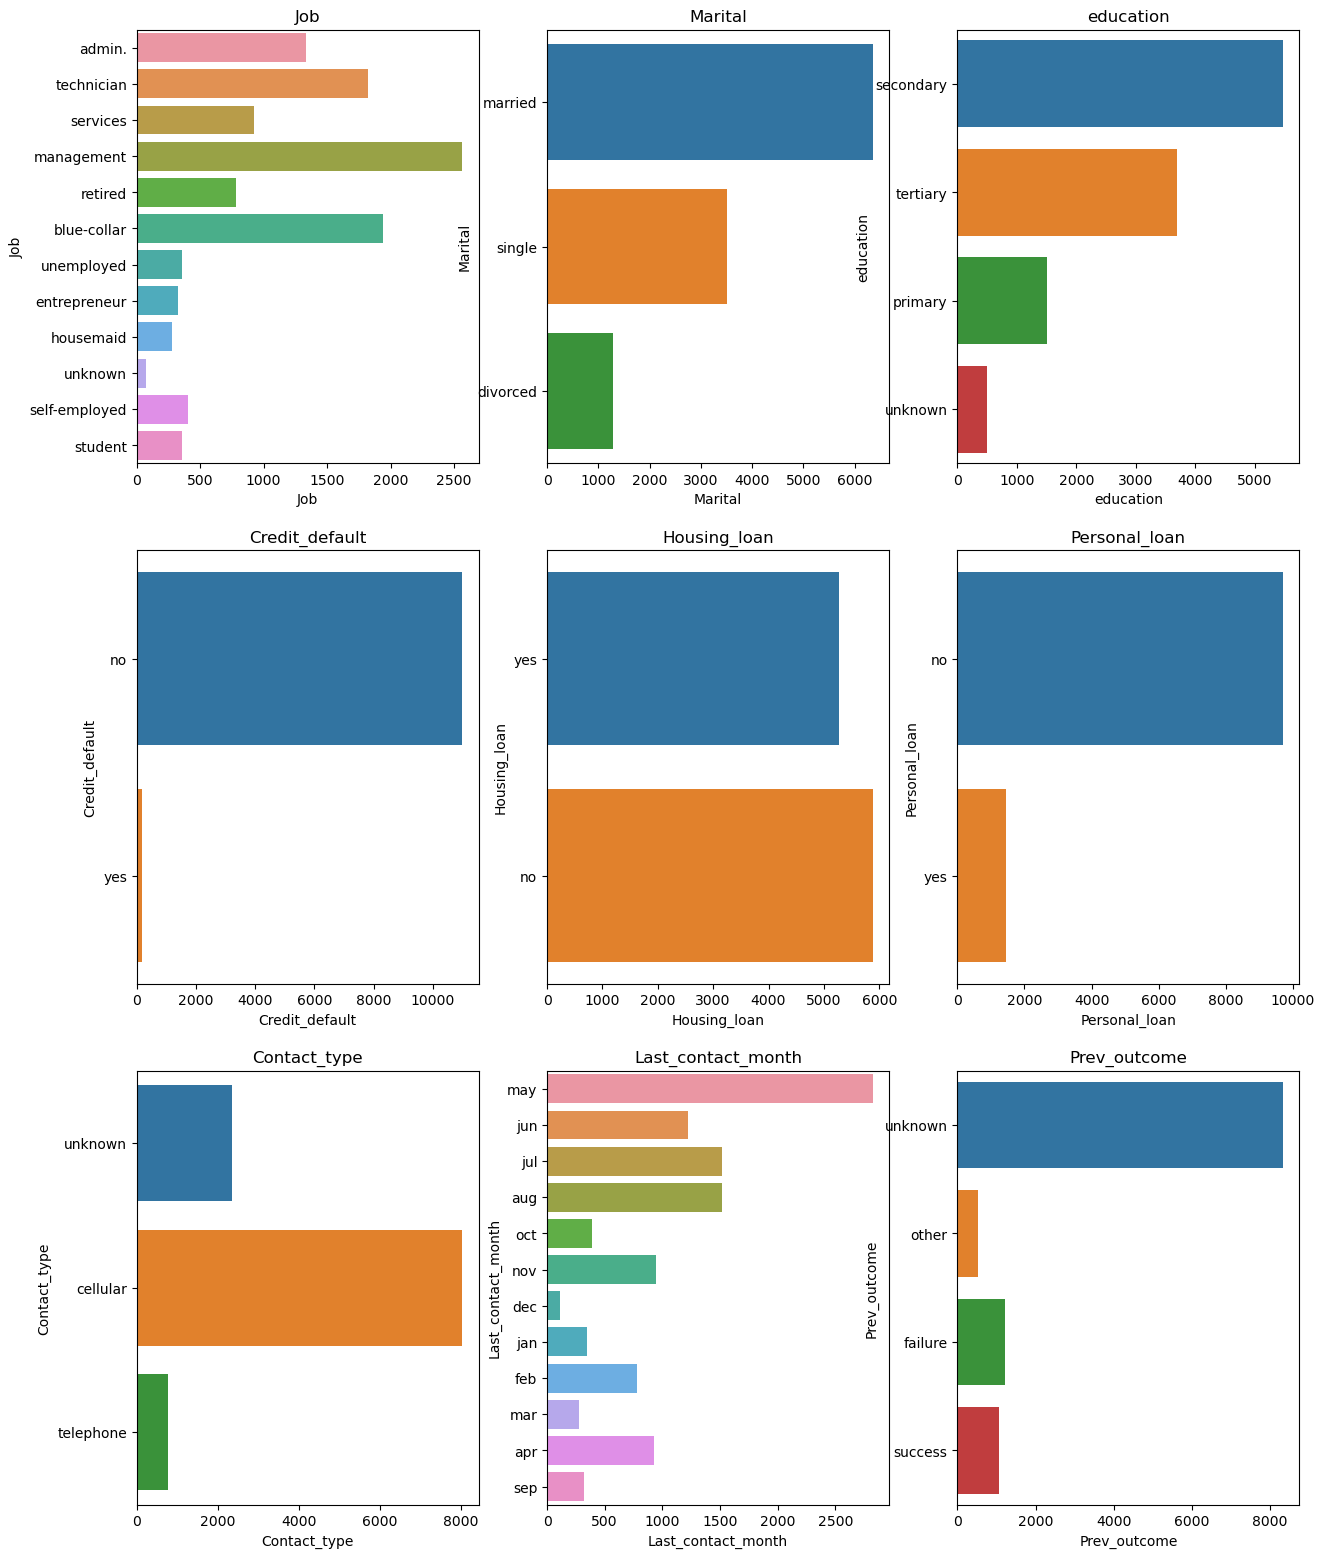

In [81]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for Categorical_feature in Categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=Categorical_feature,data=df)
    plt.xlabel(Categorical_feature)
    plt.title(Categorical_feature)
    plotnumber+=1
plt.show()

- Clients with job type as Management are very high in given dataset and Housemaid are very less.
- Clients who are married are high in given dataset compared to the Divorced.
- Clients with Education background as secondary are in high numbers in given dataset
- Credit_default feature seems to play no significance because the Ratio of NO is very high and YES is negligible.
- Data is very high in the Month of May and very less in the Month of Dec

# Relationship between Categotical Features and Label

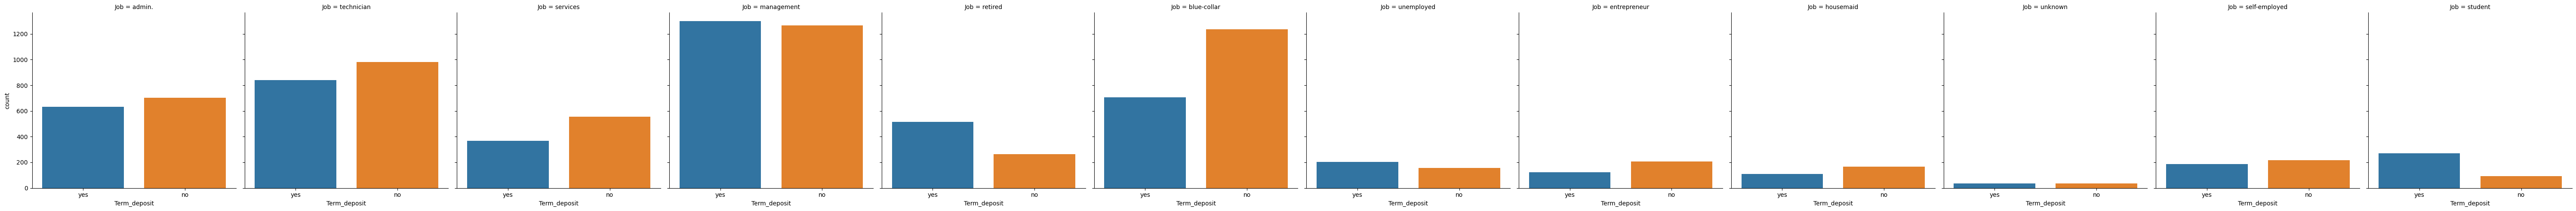

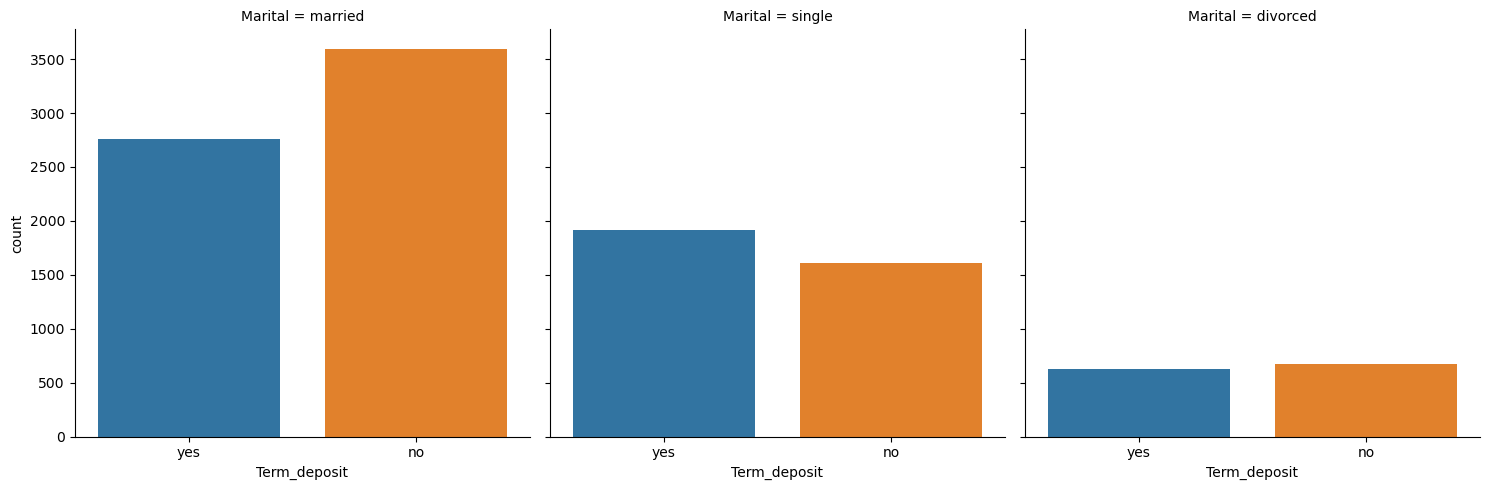

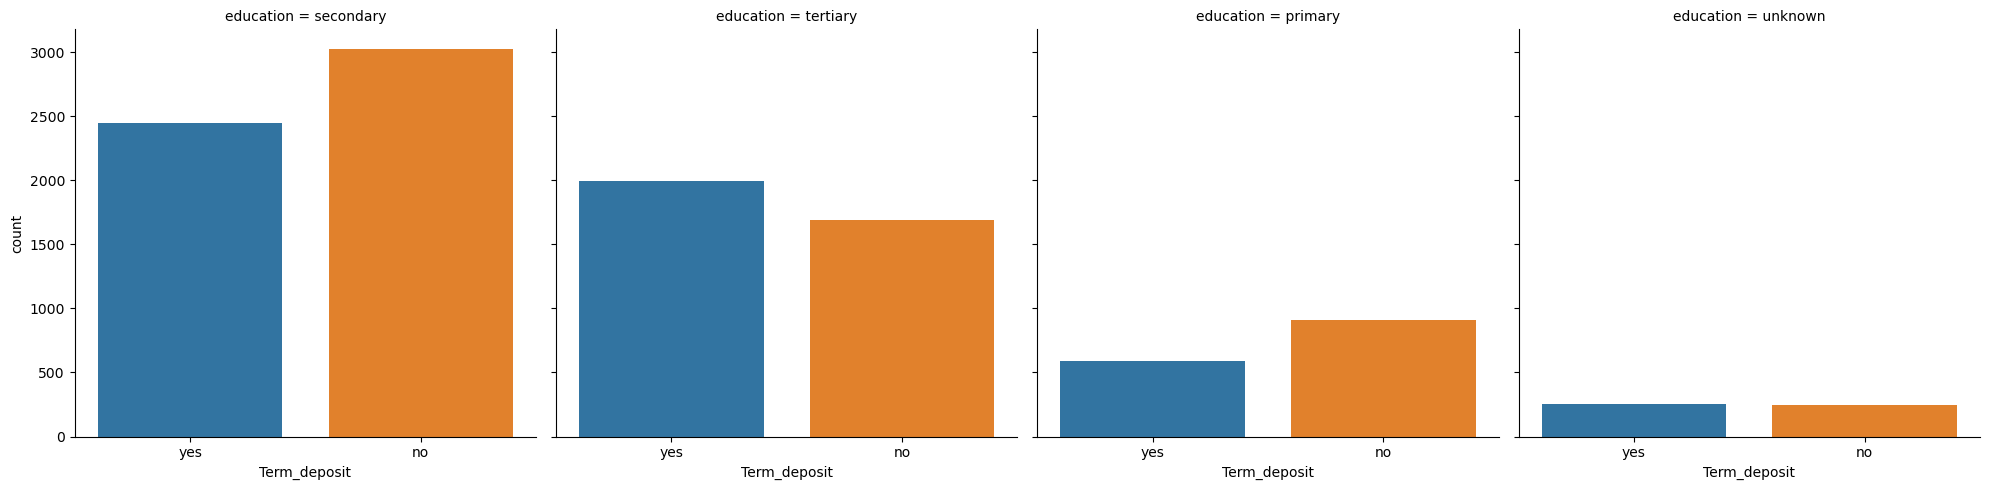

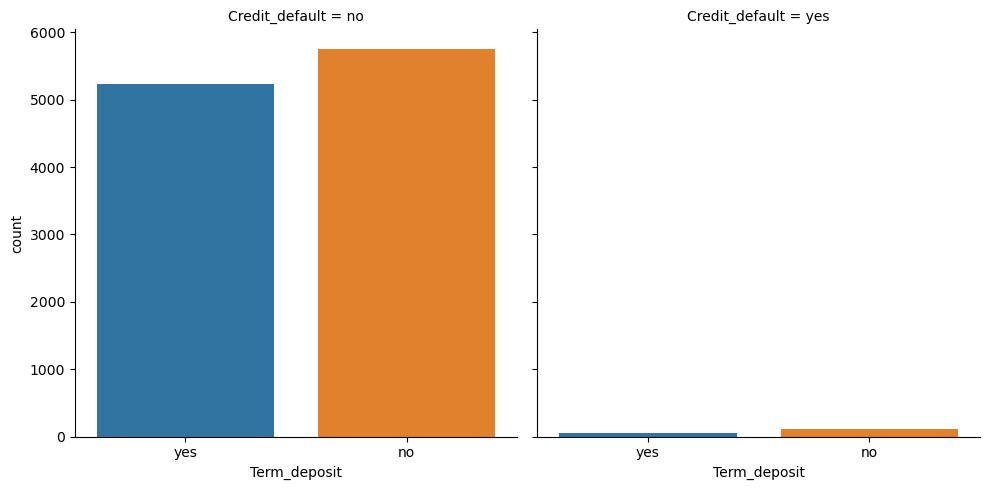

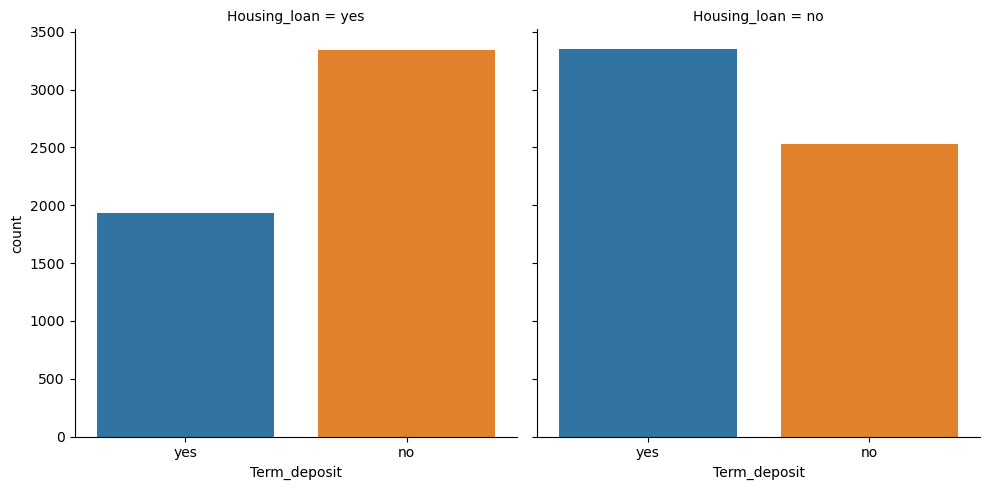

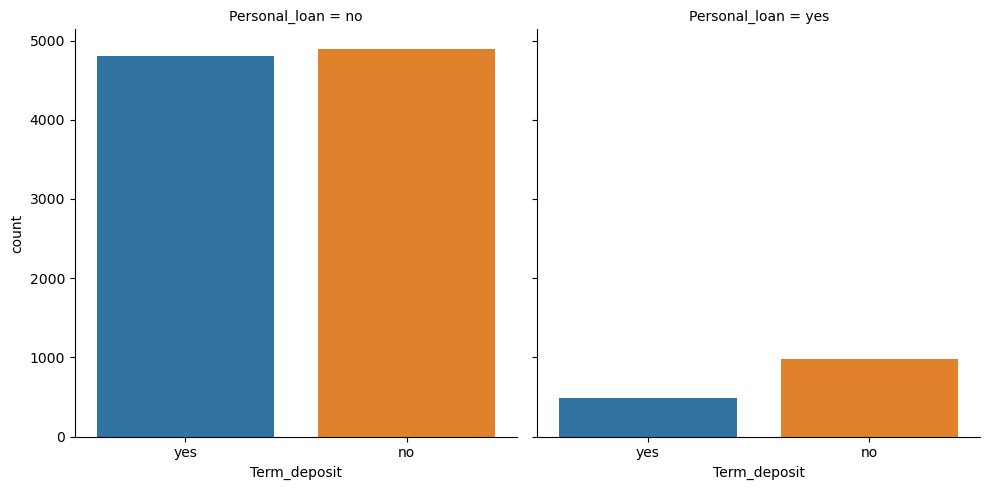

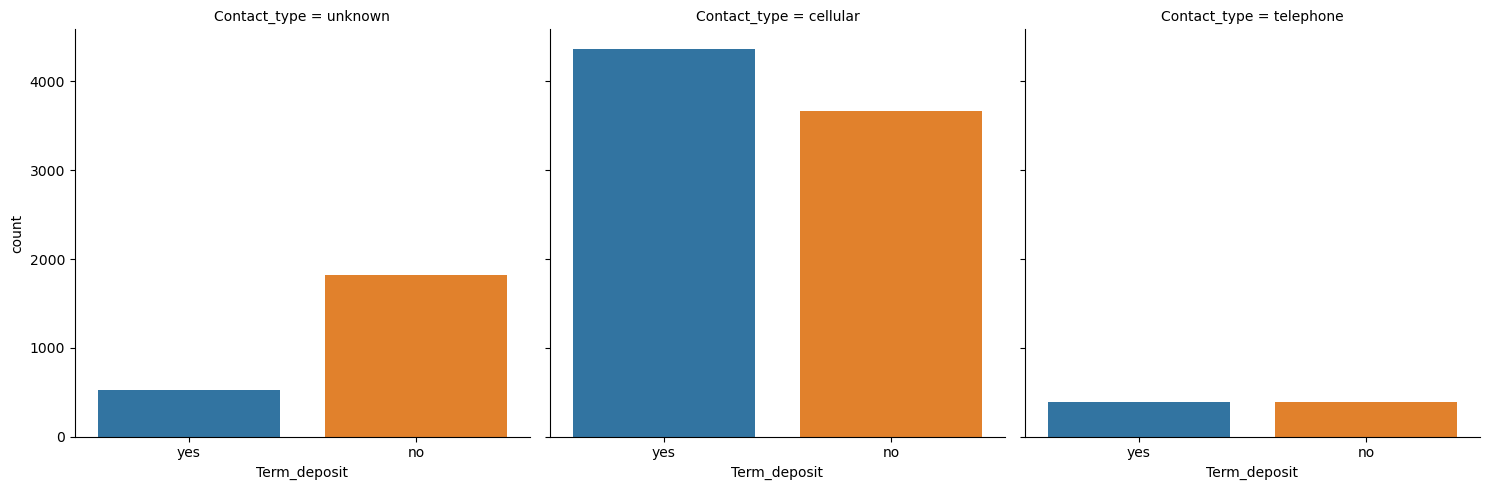

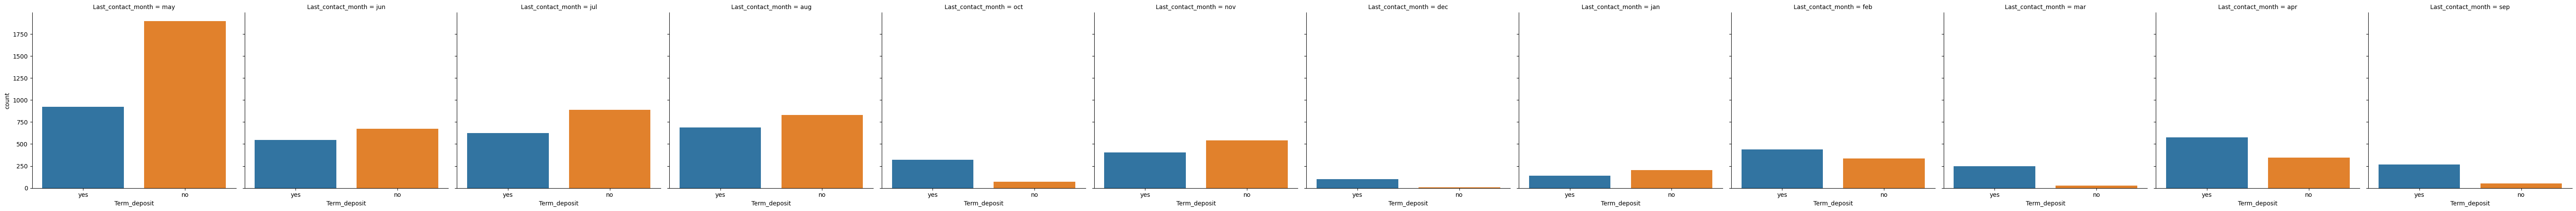

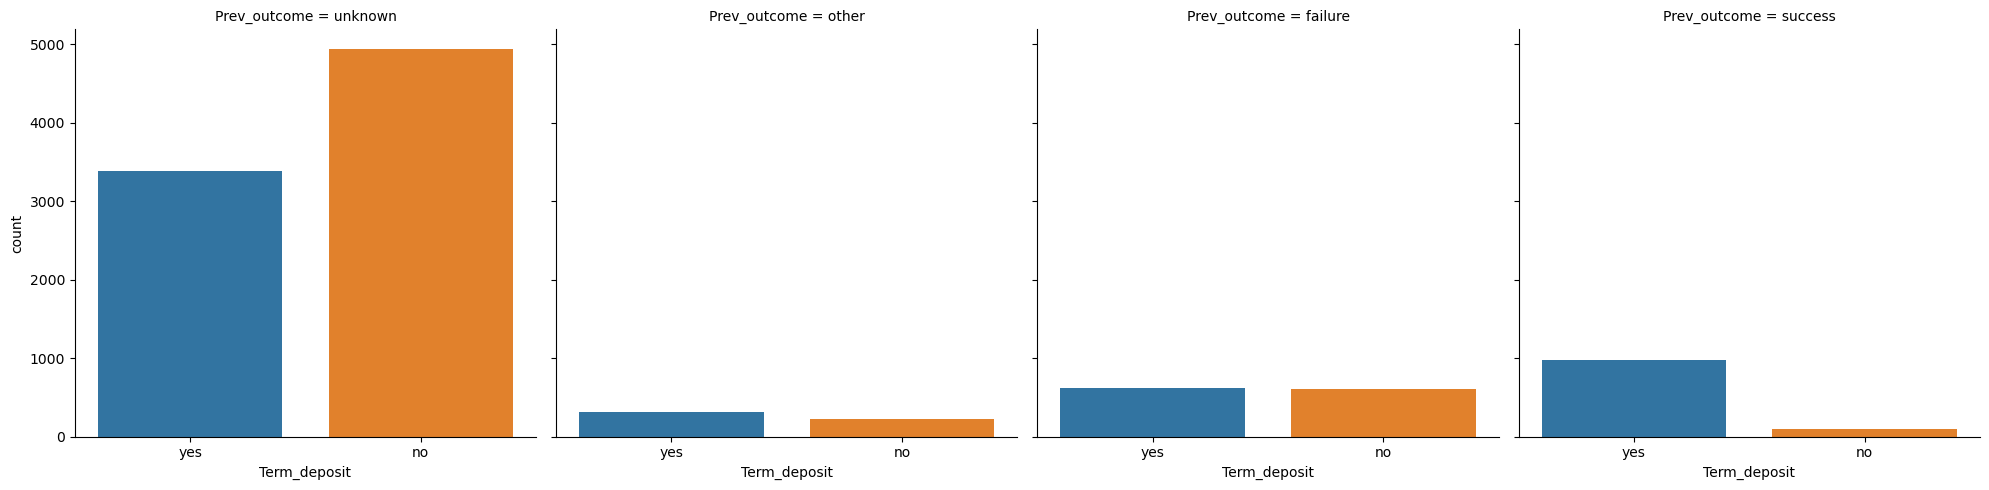

In [82]:
#Check target label split over categorical features
#TO find out the relationship between categorical variable and dependent variable
for Categorical_feature in Categorical_features:
    sns.catplot(x='Term_deposit', col=Categorical_feature, kind='count', data= df)
plt.show()

In [83]:
#Check target label split over categorical features and find the count
for Categorical_feature in Categorical_features:
    print(df.groupby(['Term_deposit',Categorical_feature]).size())

Term_deposit  Job          
no            admin.            703
              blue-collar      1236
              entrepreneur      205
              housemaid         165
              management       1265
              retired           262
              self-employed     218
              services          554
              student            91
              technician        983
              unemployed        155
              unknown            36
yes           admin.            631
              blue-collar       708
              entrepreneur      123
              housemaid         109
              management       1301
              retired           516
              self-employed     187
              services          369
              student           269
              technician        840
              unemployed        202
              unknown            34
dtype: int64
Term_deposit  Marital 
no            divorced     671
              married     3596
          

- Retired clients have high interest on Term deposit
- Clients with housing loan seem to be not interested much on the Term deposit
- If Previous campaign outcome is Successful then, there is high chance of client to show interest on Term deposit
- In Month of March, September, October and December, clients show high interest to Term deposit
- In Month of may, records are very high but Client interest ratio is very less

# Explore the Numerical Features

In [84]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


,Age,Bank_balance,Last_Contact_day,Call_Duration,Current_campaign_contact,Days_since_prev_contact,Prev_campaign_contacts
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [85]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


- There are no Discrete Variables in the Given Dataset

# Find Continous Numerical Features

In [86]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


# Distribution of Continous Numerical Features

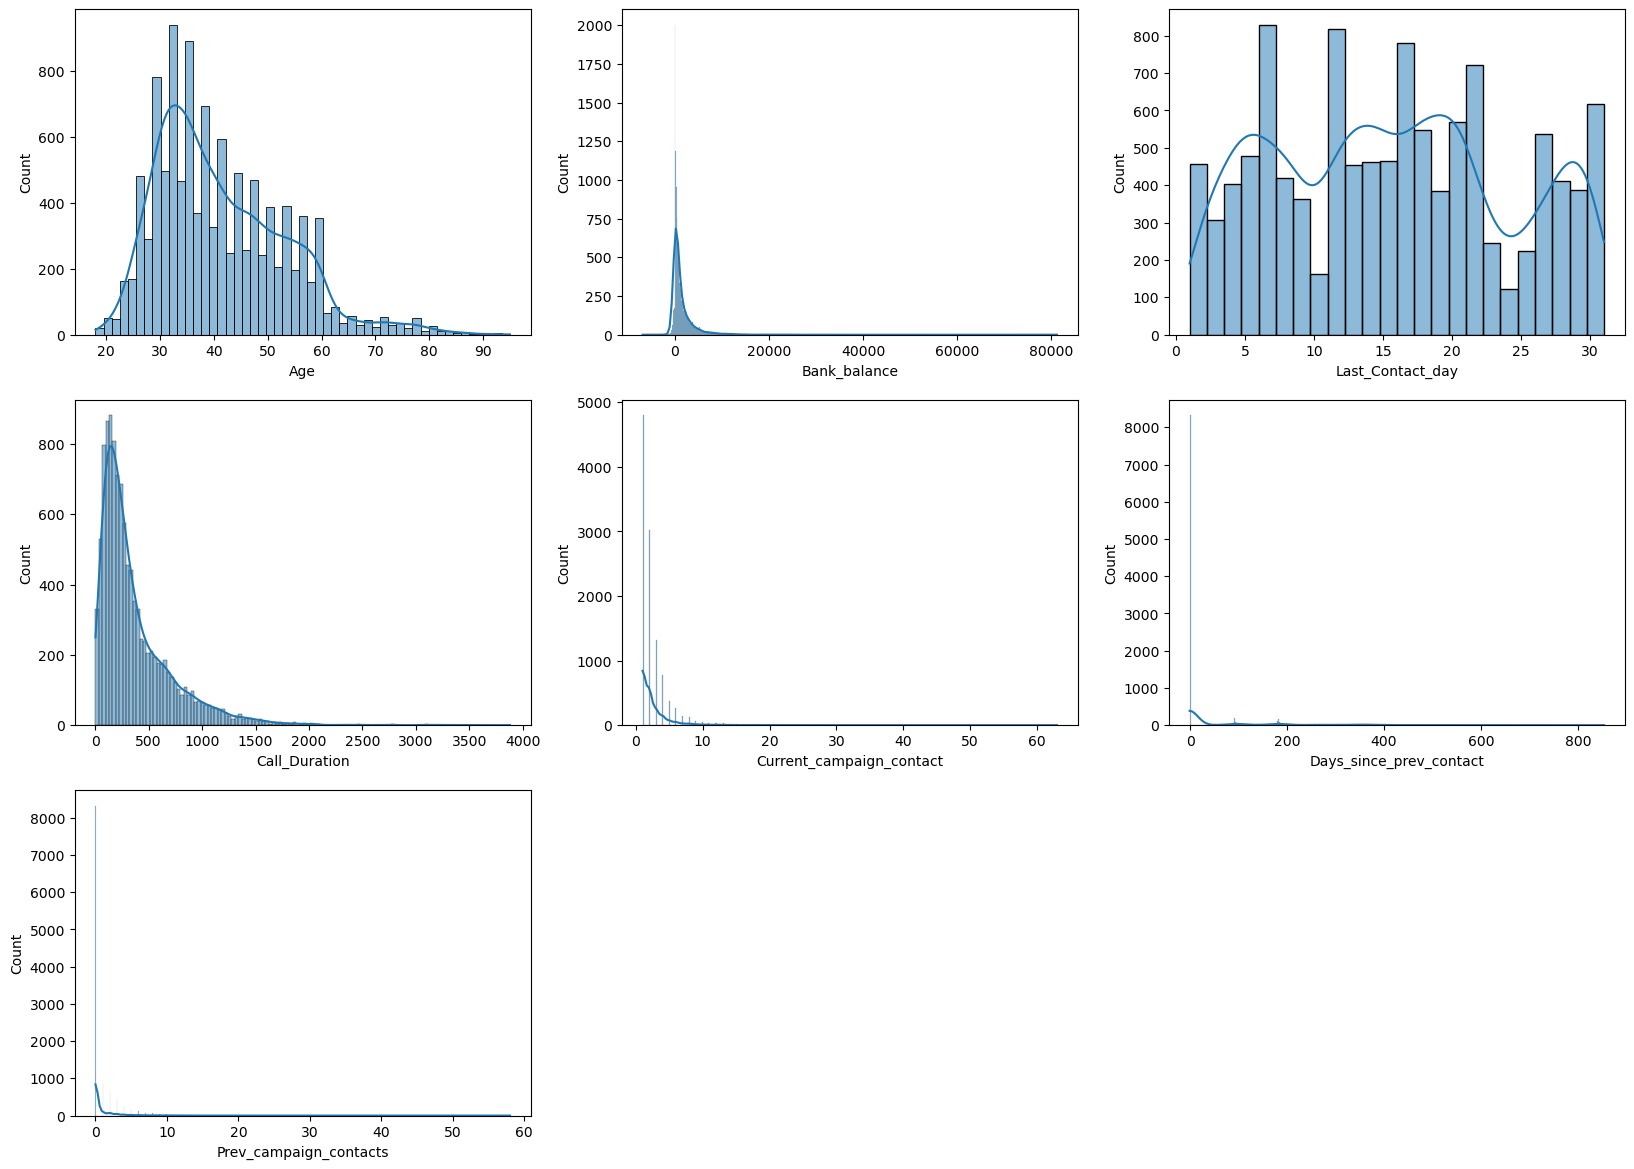

In [88]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for continuous_feature in continuous_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.histplot(df[continuous_feature], kde=True, ax=ax)  # kde=True adds the KDE line
    plt.xlabel(continuous_feature)
    plotnumber += 1
plt.show()


- Features Age and Last_contact_day seem to be normally distributed
- All other Features are heavely skewed towards left and seem to have some outliers too

# Relation between Continous numerical Features and Labels

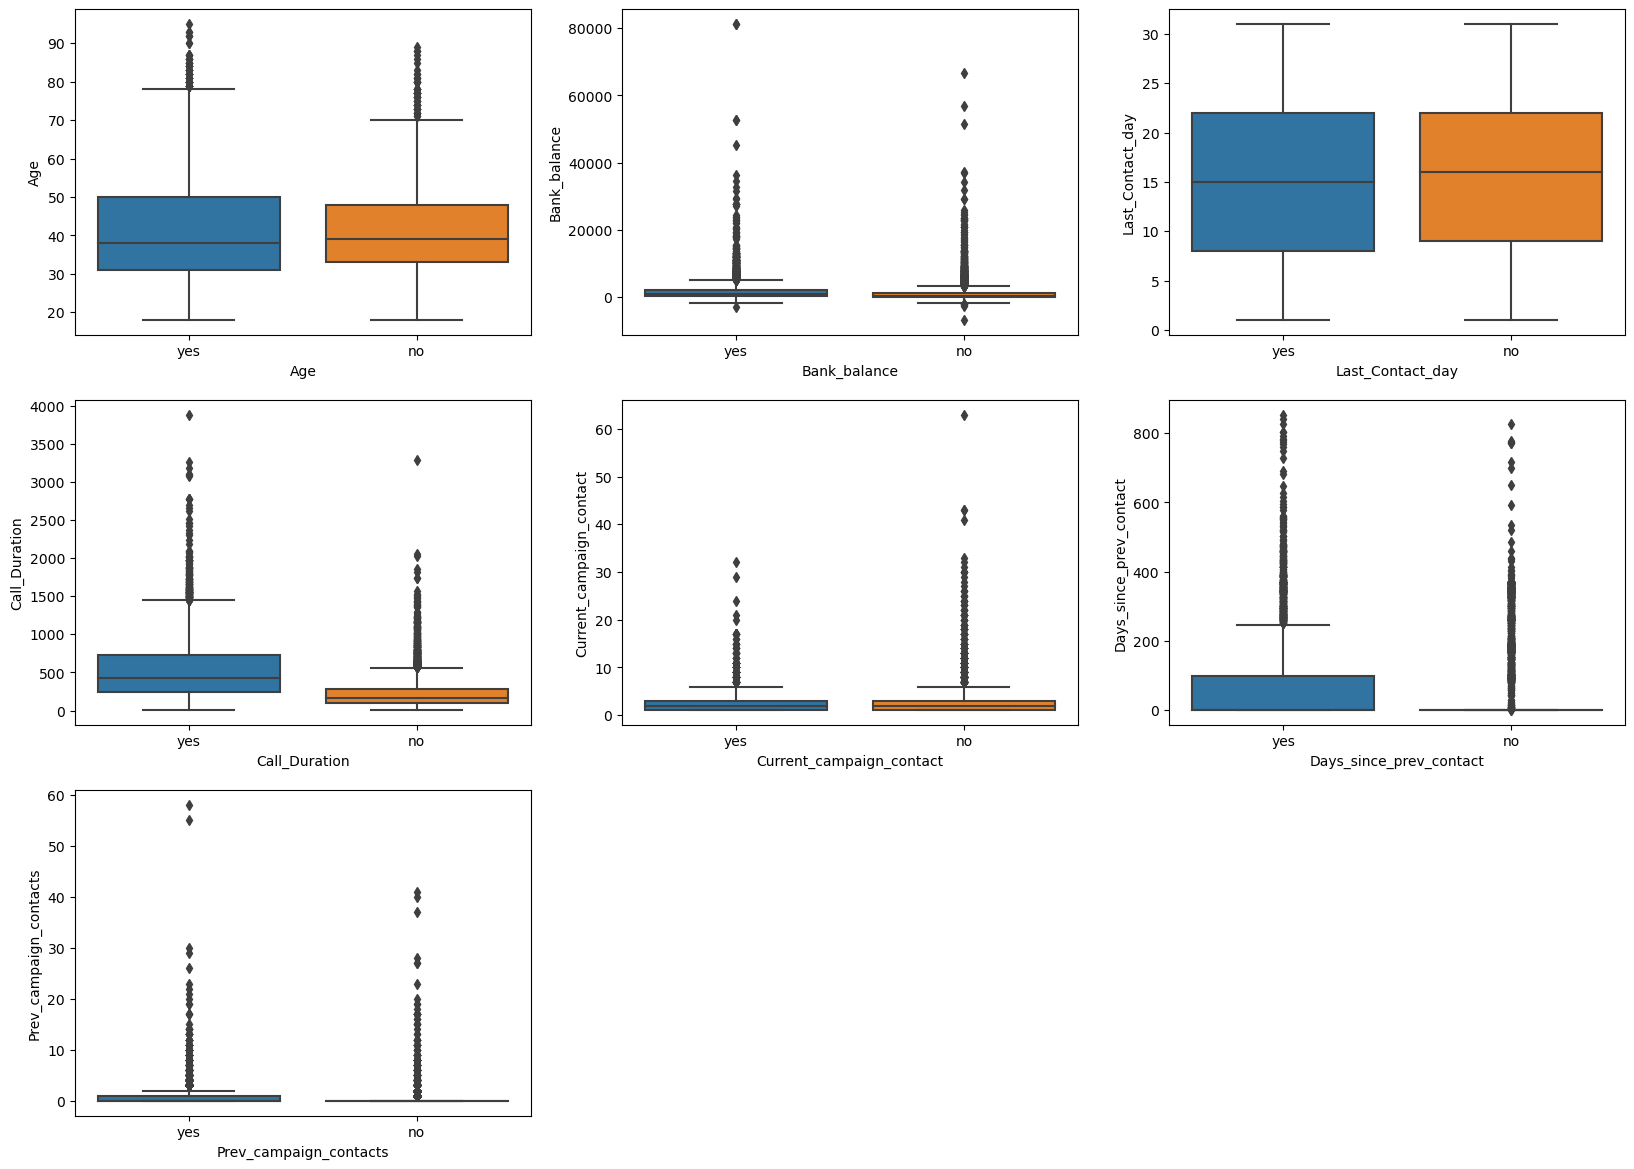

In [90]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="Term_deposit", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

- Clients who had Longer Call duration seem to show more Interest 


# Find Outliers in Numerical Features

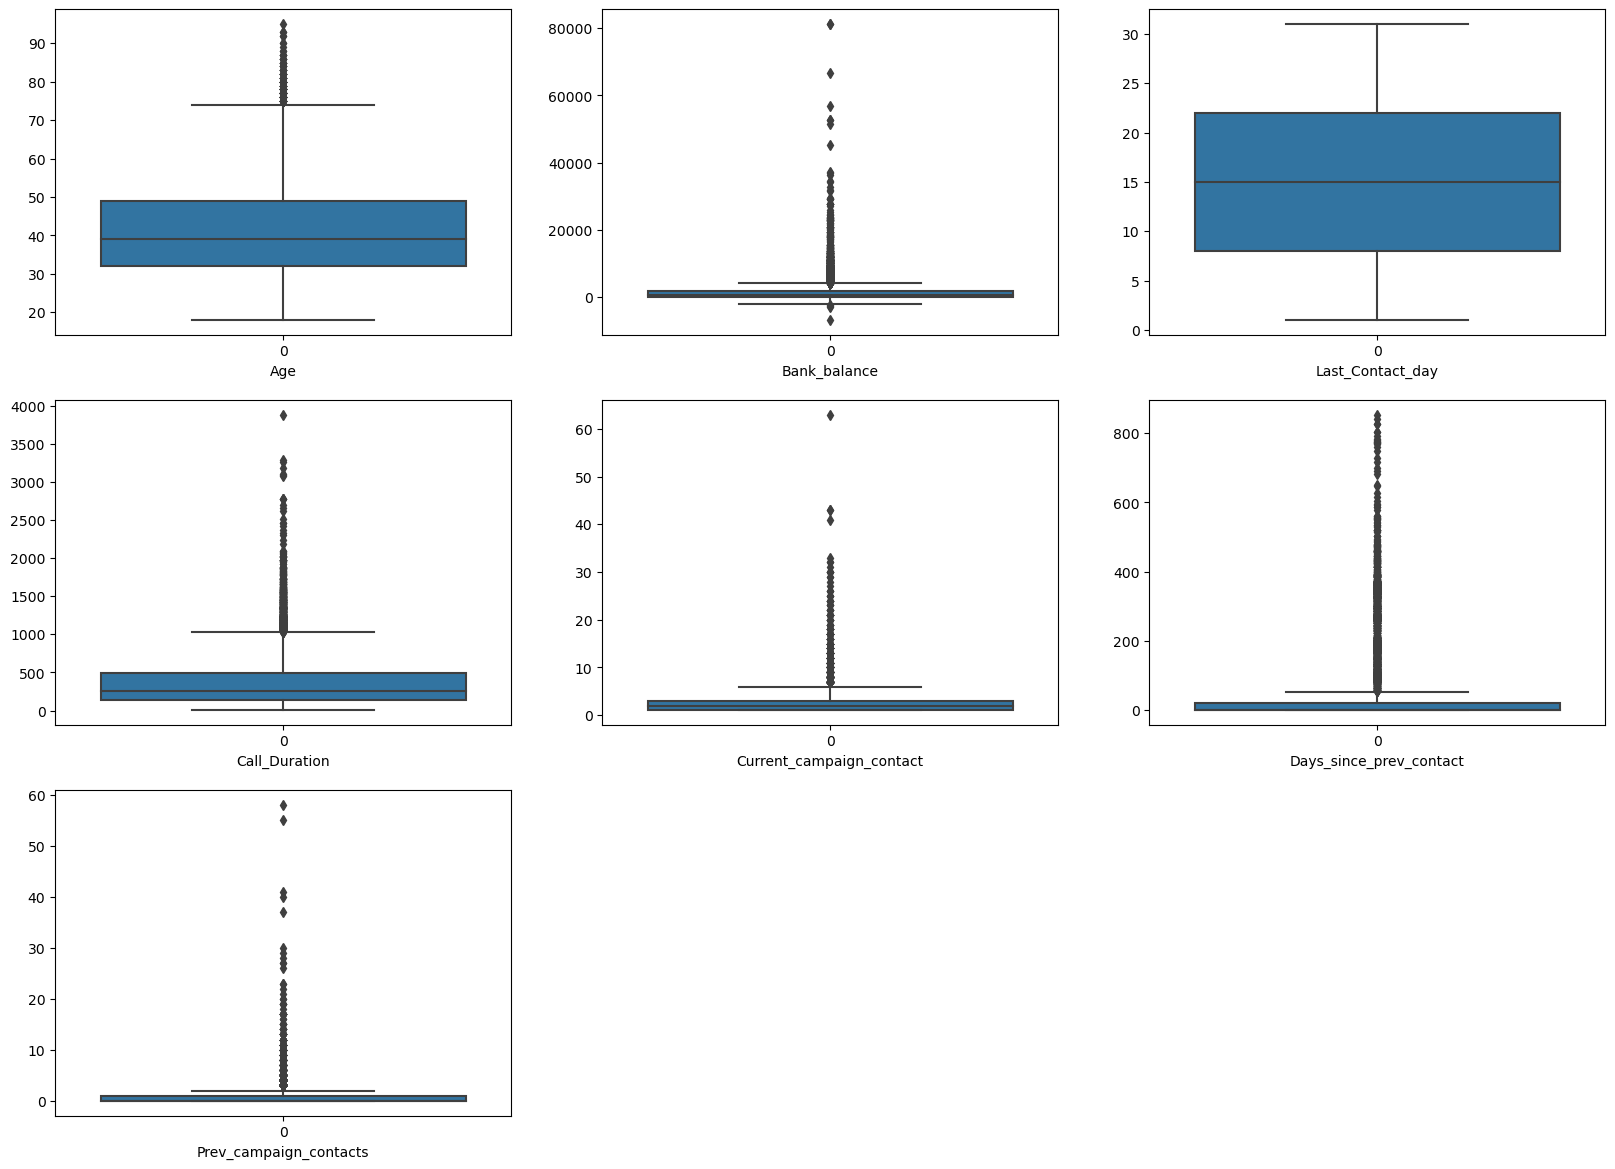

In [91]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

- Age, Bank balance, Call Duration, Current & Previous campaigns contacts and Days since last contact has Outliers

# Explore the Correlation between Numerical Features

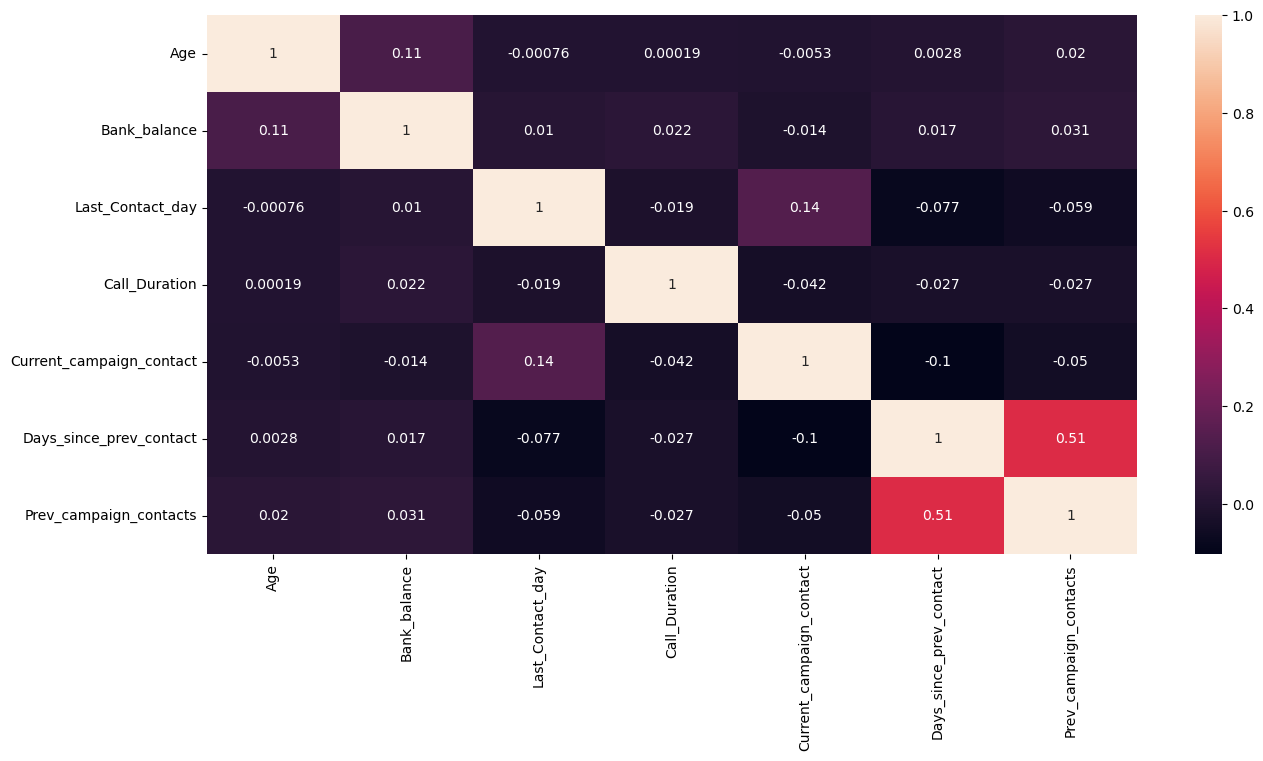

In [93]:
# Checking for Correlation
cor_mat = df.corr(numeric_only=True)

# Plotting the heatmap
fig = plt.figure(figsize=(15, 7))
sns.heatmap(cor_mat, annot=True)
plt.show()


- It seems like None of the features are heavily correlated with other features

# Check the Data set is Balanced or not based on Target Values

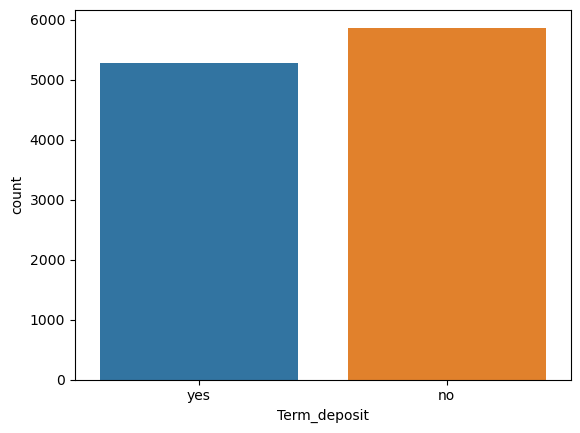

In [95]:
#total patient count based on cardio_results
sns.countplot(x='Term_deposit',data=df)
plt.show()

In [97]:
df['Term_deposit'].groupby(df['Term_deposit']).count()

Term_deposit
no     5873
yes    5289
Name: Term_deposit, dtype: int64

- The Dataset is almost Balanced